<a id='top'></a>

# Homework 4: CSCI 4022 F19
***

**Name**: Adam Ten Hoeve

***

This assignment is due on Canvas by **MIDNIGHT on Friday November 1**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.
**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) 

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)
# Problem 1 (15 pts; Theory: Hubs and Authorities)

Suppose our graph is a chain of $n$ nodes, as shown below.  Compute the hubs and authorities vectors, as a function of $n$.

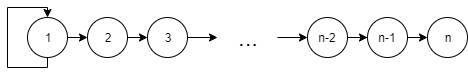

Let's start by creating the association link matrix:

$$\begin{bmatrix} 
    1 & 1 & 0 & 0 & \dots & 0 \\
    0 & 0 & 1 & 0 & \dots & 0 \\
    0 & 0 & 0 & 1 & \dots & 0 \\
    0 & 0 & 0 & 0 & \ddots & 0 \\
    \vdots & \vdots & \vdots & \vdots& & \vdots \\
    0 & 0 & 0 & 0 & \dots & 1 \\
    0 & 0 & 0 & 0 & \dots & 0 
    \end{bmatrix}=L$$
    
$$\begin{bmatrix} 
    1 & 0 & 0 & 0 & \dots & 0 \\
    1 & 0 & 0 & 0 & \dots & 0 \\
    0 & 1 & 0 & 0 & \dots & 0 \\
    0 & 0 & 1 & 0 & \dots & 0 \\
    \vdots & \vdots & \vdots & \ddots & & \vdots \\
    0 & 0 & 0 & \dots & 1 & 0 
    \end{bmatrix}=L^T$$
    

    
Note that the matrix is of size $n \times n$, which means our hub $(h^{(0)})$ and authority $(a^{(0)})$ vectors will be of size $n \times 1$, initialized with all 1's. The first step is $a^{(1)} = L^Th^{(0)}$ and normalize by dividing by the maximum value so the largest value becomes 1:

$$
a^{(1)} = L^Th^{(0)} = [1, 1, \dots, 1, 1]^T \rightarrow \frac{a^{(1)}_i}{max(a^{(1)}_i)} = [1, 1, \dots, 1, 1]^T
$$

Now solve for $h^{(1)} = La^{(1)}$ and normalize:
$$
h^{(1)} = La^{(1)} = [2, 1, \dots, 1, 0]^T \rightarrow [1, 1/2, \dots, 1/2, 0]^T
$$
Then repeat this process:
$$
a^{(2)} = L^Th^{(1)} = [1, 1, 1/2, \dots, 1/2, 1/2]^T \\
h^{(2)} = La^{(2)} = [1+1, 1/2, \dots, 1/2,  1/2, 0]^T \rightarrow [1, 1/4, \dots, 1/4, 1/4, 0]^T \\
a^{(3)} = L^Th^{(2)} = [1, 1, 1/4, \dots, 1/4, 1/4]^T \\
h^{(3)} = La^{(3)} = [1+1, 1/4, \dots, 1/4,  1/4, 0]^T \rightarrow [1, 1/8, \dots, 1/8, 1/8, 0]^T
$$

From here, we can begin to see a pattern where, on iteration $m$ of the algorithm, the authority vector becomes $[1, 1, 1/(2^{m-1}),\dots, 1/(2^{m-1})]$ and the hub vector becomes $[1, 1/(2^m), \dots, 1/(2^m), 0]$. This is confirmed in the code cell below, where n=5 and we run the algorithm for 10 loops.

In [2]:
# For simplicity, assume n=5
n=5
L = np.zeros((n, n))
L[0,0] = 1
for i in range(n-1):
    L[i, i+1]=1
    
h = np.ones(n)
a = np.ones(n)

# Perform 10 loops
m = 10
for ii in range(m):
    a = np.matmul(L.T, h)
    a = a / np.max(a)
    h = np.matmul(L, a)
    h = h / np.max(h)

In [3]:
print("For {} loops, the authority vector is {}".format(m, a))

For 10 loops, the authority vector is [1.         1.         0.00195312 0.00195312 0.00195312]


In [4]:
print("Notice that 1/(2^(m-1)) = {}".format(1/(2**9)))

Notice that 1/(2^(m-1)) = 0.001953125


In [5]:
print("For {} loops, the hub vector is {}".format(m, h))

For 10 loops, the hub vector is [1.000000e+00 9.765625e-04 9.765625e-04 9.765625e-04 0.000000e+00]


In [6]:
print("Notice that 1/(2^m) is {}".format(1/(2**10)))

Notice that 1/(2^m) is 0.0009765625


***
<a/ id='p2'></a>
[Back to top](#top)
# Problem 2 (15 pts; Theory: Network MLEs)

Suppose graphs are generated by picking a probability $p$ and choosing each edge independently with probability $p$, as if our entire network were coming from a Community Affiliation Graph Model (AGM) with only *one*  universal community.

What value of $\hat{p}$ gives the maximum likelihood of seeing a specific graph with $n$ total nodes and $e$ total edges? What is the probability that your observed, specific graph is the one generated, if $p=\hat{p}$?

Because we are treating the whole graph as a single community, we just have to think about the probability that each node connects to each other node. This means that we can treat each edge existing as a bernoulli random variable where the probability of a success (being that the edge exists) is p. Then the way to find the number of successes with a Binomial distribution, where $e$ is the number of successes. Given that there are $n$ total nodes, there is at max $\frac{n(n-1)}{2} \ge e$ edges. If we let $a=\frac{n(n-1)}{2}$, then:

$$ Bin(e; a, p) = {a \choose e}p^e(1-p)^{a-e} = \frac{a!}{e!(a-e)!}p^e(1-p)^{a-e}$$

Our log-likelihood function then becomes:

$$ \ell(p; e, a) = log(a!) - log(e!(a-e)!) + elog(p) + (a-e)log(1-p) $$

To solve for the maximum likelihood estimator of $p$, we can take the derivative with respect to $p$ and set it equal to zero:

$$ 
\begin{align*}
    0 &= \frac{d\ell}{dp} \Big(log(a!) - log(e!(a-e)!) + elog(p) + (a-e)log(1-p) \Big) \\
    0 &= \dfrac{e}{p} - \dfrac{a-e}{1-p} \\
    0 &= (1-p)e - p(a-e) \\
    0 &= e - ep - ap + ep \\
    0 &= e - ap \\
    \hat{p} &= \dfrac{e}{a} = \dfrac{e}{\frac{n(n-1)}{2}} = \dfrac{2e}{n(n-1)} 
\end{align*}
$$

Now to get the probability that we a get a specific graph, we need to think about the probability of each edge. As our specific graph has $e$ edges, and the probability of each of those edges is $p$, then the probability of all of those edges occuring is $p^e$. If we have $e$ edges in the graph, and there are $\frac{n(n-1)}{2}$ total possible edges between all nodes, then the number of "non-edges" between nodes is $\frac{n(n-1)}{2}-e$. As the probability of an edge occuring ibetween two nodes is $p$, the probability of an edge not occuring is $1-p$. If we put all these together, we get:

$$ P(G; p, e, n) = p^e(1-p)^{\frac{n(n-1)}{2} - e}$$

If we plug in $p = \hat{p} = \dfrac{2e}{n(n-1)}$ into our function, we get:

$$ \boxed{ P(G; e, n) = \Big( \dfrac{2e}{n(n-1)} \Big)^e \Big(1 - \dfrac{2e}{n(n-1)} \Big)^{\frac{n(n-1)}{2} - e} }$$

***
<a/ id='p3'></a>
[Back to top](#top)
# Problem 3 (25 pts; Coding: *Sparse* Hubs and Authorities)

Consider the graph from HW 2 #4: 

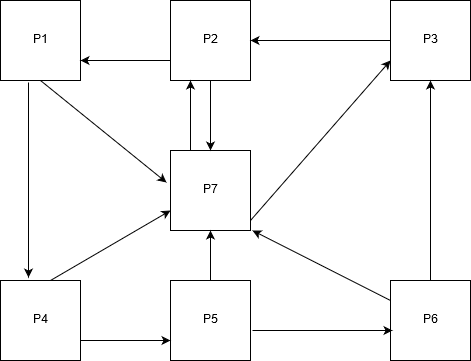

### Part A
i) Implement Hubs and Authorities (HITS algorithm)  on this graph.  Report the final Hub score vector and final Authority score vector.

In [7]:
def dist_L2(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [8]:
# Initialize association link matrix
L = np.array([[0, 0, 0, 1, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 1],
              [0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 1],
              [0, 0, 0, 0, 0, 1, 1],
              [0, 0, 1, 0, 0, 0, 1],
              [0, 1, 1, 0, 0, 0, 0]])

# Initialize hub and authority vectors
hub = np.ones(L.shape[0])
aut = np.ones(L.shape[0])
hub_old = np.zeros(L.shape[0])
aut_old = np.zeros(L.shape[0])
# Compute hub and authority scores
max_change = np.max([dist_L2(hub, hub_old), dist_L2(aut, aut_old)])
while max_change > 0.001:
    hub_old = hub
    aut_old = aut
    
    aut = np.matmul(np.transpose(L), hub)
    aut = aut / np.max(aut)
    hub = np.matmul(L, aut)
    hub = hub / np.max(hub)
    
    max_change = np.max([dist_L2(hub, hub_old), dist_L2(aut, aut_old)])

print("The authority vector is {}".format(np.round(aut, 4)))
print("The hub vector is {}".format(np.round(hub, 4)))

The authority vector is [0.1978 0.0651 0.2629 0.1978 0.1978 0.1978 1.    ]
The hub vector is [0.9485 0.9485 0.0515 0.9485 0.9485 1.     0.2597]


ii)  Explain why the largest and smallest hub and largest and smallest authorities are expected from the graph itself.

In terms of authority scores, node 7 has the highest score and node 2 had the lowest. It makes sense that node 7 is the largest authority as nearly every other node links to it, making it a "good" page for the topic. Node 2 had the lowest authority score because it is pointed to by nodes 3 and 7, which both have low hub scores, because they don't point to a lot of nodes. Because of this, node 2 has a resulting low authority score.

For the hub score, Node 6 had the largest score and Node 3 had the least. Node 6 has the highest hub score because it has outlinks to the two nodes with the highest authority, Nodes 3 and 7, whereas most other nodes only point to Node 7. Node 3 has the least hub score because its only outlink is to Node 2, which has the lowest authority score.

iii) Suppose we were to take this graph and draw an arrow from P1 to P6.  In theory, what should happen to the hub score and authority score to P4?  You may (and probably should) *verify* your results by running the appropriate code, but will be evaluated based on your intuitive result.

To understand how Node 4's authority score changes, we should notice that the only inlink to node 4 comes from node 1, so its change in authority only depends on how node 1's change in hub score. Node 1 will become a better hub (because it points to more things), so because node 4 is being pointed to by a better hub, it will become a better authority. 

Node 4 has outlinks to nodes 5 and 7, so the change in Node 4's hub score will depend on the changes to Nodes 4 and 7's authority scores. Node 7's authority score will likely remain the same as it is still has the highest number of inlinks. Node 5's authority score will likely decrease because, whereas it was previously pointed to by a "chain" of outlinks from $1 \rightarrow 4 \rightarrow 5$, it is now only recieving part of the links from 1. Because Node 5's authority will decreases, Node 4's hub score will also decrease.

We can see that these are confirmed in the code cell below.

In [9]:
# Initialize association link matrix
L2 = np.array([[0, 0, 0, 1, 0, 1, 1],
               [1, 0, 0, 0, 0, 0, 1],
               [0, 1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, 0, 1],
               [0, 0, 0, 0, 0, 1, 1],
               [0, 0, 1, 0, 0, 0, 1],
               [0, 1, 1, 0, 0, 0, 0]])

# Initialize hub and authority vectors
hub = np.ones(L2.shape[0])
aut = np.ones(L2.shape[0])
# Compute hub and authority scores
hub = np.ones(L2.shape[0])
aut = np.ones(L2.shape[0])
hub_old = np.zeros(L2.shape[0])
aut_old = np.zeros(L2.shape[0])
# Compute hub and authority scores
max_change = np.max([dist_L2(hub, hub_old), dist_L2(aut, aut_old)])
while max_change > 0.001:
    hub_old = hub
    aut_old = aut
    
    aut = np.matmul(np.transpose(L2), hub)
    aut = aut / np.max(aut)
    hub = np.matmul(L2, aut)
    hub = hub / np.max(hub)
    
    max_change = np.max([dist_L2(hub, hub_old), dist_L2(aut, aut_old)])

print("The authority vector is {}".format(np.round(aut, 4)))
print("The hub vector is {}".format(np.round(hub, 4)))

The authority vector is [0.1734 0.0464 0.2198 0.2553 0.1734 0.473  1.    ]
The hub vector is [1.     0.6789 0.0268 0.6789 0.8523 0.7058 0.154 ]



### Part B
Implement Hubs and Authorities on this graph by encoding the original matrix in *sparse matrix form*.  This will require you modify your sparse page rank algorithm to adapt to sparsity for both $L$ and $L^T$!  Verify your algorithm worked by comparing to the results in part A i).

In [10]:
# Making a triangular array
L_sparse = [[2, [4, 7]],
            [2, [1, 7]],
            [1, [2]],
            [2, [5, 7]],
            [2, [6, 7]],
            [2, [3, 7]],
            [2, [2, 3]]]
L_sparse_T = [[1, [2]],
              [2, [3, 7]],
              [2, [6, 7]], 
              [1, [1]],
              [1, [4]],
              [1, [5]],
              [5, [1, 2, 4, 5, 6]]]
# Initialize vectors
hub = np.ones(len(L_sparse))
aut = np.ones(len(L_sparse))
hub_old = np.zeros(len(L_sparse))
aut_old = np.zeros(len(L_sparse))
max_dist = np.max([dist_L2(hub, hub_old), dist_L2(aut, aut_old)])
thresh = 0.001

# Do the sparse loop
while max_dist > thresh:
    # Restart the process each time
    aut_old = aut
    hub_old = hub
    aut = np.zeros(len(L_sparse))
    hub = np.zeros(len(L_sparse))
    
    # Update the aut scores
    for page in range(len(L_sparse)):
        for dest in L_sparse[page][1]:
            idx = dest - 1  # Account for 0-based indexing
            aut[idx] += hub_old[page]  # The aut of node i is the sum of the old_hub scores of nodes pointing to i
    # Normalize aut vector
    aut = aut / np.max(aut)
            
    # Update the hub scores
    for page in range(len(L_sparse_T)):
        for source in L_sparse_T[page][1]:
            idx = source - 1  # Account for 0-based indexing
            hub[idx] += aut[page]  # The hub is the sum of the aut scores that node i points to.
    # Normalize hub vector
    hub = hub / np.max(hub)
    
    max_dist = np.max([dist_L2(hub, hub_old), dist_L2(aut, aut_old)])
    
print("The authority vector is {}".format(np.round(aut, 4)))
print("The hub vector is {}".format(np.round(hub, 4)))

The authority vector is [0.1978 0.0651 0.2629 0.1978 0.1978 0.1978 1.    ]
The hub vector is [0.9485 0.9485 0.0515 0.9485 0.9485 1.     0.2597]


For comparison, the hub and authority vectors from part A are:

The authority vector is [0.1978 0.0651 0.2629 0.1978 0.1978 0.1978 1.    ]  
The hub vector is [0.9485 0.9485 0.0515 0.9485 0.9485 1.     0.2597]

***
<a/ id='p4'></a>
[Back to top](#top)
# Problem 4 (20 pts; Coding: PageRank)

Consider the sparsely encoded link matrix in `CompactLinks`.  

Run the PageRank algorithm on this graph.  Report the final PageRanks as an ordered ranking of the pages.  Include a teleportation probability of 15%.

In [102]:
# Generate link matrix
LM = []
node_map = []  # Create a map from nodeID to index
with open("CompactLinks.txt") as links:
    # For each node, add it the the link matrix as the root and all other nodes as outs of that node
    for line in links:
        line = line.strip().split()
        node = line[0]
        out_links = line[1:]
        # Append the [out_degree, [out_nodes]] to the link array
        LM.append([len(out_links), out_links])
        # Add the node to the dictionary and iterate index
        node_map.append(node)

In [103]:
n = len(LM)
beta = 0.85  # Beta is chance of following actual link, so chance of teleportation is 1-beta=0.15
r_old = np.repeat(1/n, n)  # Initialize entire power iteration
r_new = np.repeat((1-beta)/n, n)  # Initialize output of a single step

# Now perform PageRank by iterating over all "rows" of the sparse matrix and repeat
for _ in range(50):
    for source_idx, row in enumerate(LM):
        for dest_node in row[1]:
            dest_idx = node_map.index(dest_node)
            r_new[dest_idx] += beta*r_old[source_idx]/row[0]
    # Add part for random teleport chance
    r_new = r_new + (1-beta)/n
    # Normalize the vector
    r_new = r_new / np.sum(r_new)
    r_old = r_new

In [113]:
ordered_nodes = np.flip(np.argsort(r_new))
print("The ordered list of nodes, from highest to lowests PageRank, is \n{}".format(np.array(node_map)[ordered_nodes]))

The ordered list of nodes, from highest to lowests PageRank, is 
['8709207' '8553535' '11287582' '12610128' '9650960' '12518224' '11044077'
 '12560332' '11886254' '11160736' '12663788' '9420209' '12857908'
 '7933109' '7831768' '11878901' '9018146' '8289365' '9784363' '11163673'
 '9568045' '11243812' '9060658' '10873782' '10364381' '11602792'
 '12050360' '10233949' '7491757' '7523700' '11581419' '10559364'
 '11040122' '11499923' '10364505' '9811779' '12033775' '7666533' '9372953'
 '9557678' '8551571' '11158207' '11145916' '11883199' '9465097' '12566713'
 '7494284' '8615005' '10362134' '12663770' '14517069' '12033769' '7561785'
 '12208977' '12706096' '8178438' '8764516' '8200503' '8139029' '10918034'
 '11289806' '9234794' '8973339' '12890615' '8806551' '9343214' '9469843'
 '9261437' '9032384' '8825715' '9311816' '10573627' '10971133' '9298727'
 '9060652' '12584306' '8601783' '8957670' '7595373' '11682199' '12533712'
 '7778283' '7745672' '8957669' '9636375' '12840887' '7815562' '8151305'


Above is the ordered list of nodes, from highest to lowest PageRank scores. I did a simple check below to see if these values are correct. Although it's difficult to definitively say what should be the highest and lowest nodes, we can make some educated assumptions. 

Because node 8709207 had 18 in-links, by far the most of the graph, we can make the assumption that it will be highly scored, which is confirmed by our algorithm, where it is the highest scoring node. This idea of more in-links meaning more PageRank score also stands for the second highest scoring node (8553535) with 7 in-links and the third highest scoring node (11287582) with 8 in-links. The lowest scoring node (11121865) doesn't have any in-links, which confirms that it's PageRank will be low (be it's only getting score from random teleports). 

Therefor, we can make the assumption that the algorithm is functioning correctly and that the nodes are correctly scored.

In [114]:
check = {}
with open("CompactLinks.txt") as links:
    for line in links:
        line = line.strip().split()
        node = line[0]
        out_links = line[1:]
        for out in out_links:
            if out not in check.keys():
                check[out] = 1
            else:
                check[out] += 1
print("A record of each node and the number of in-links to it:")
check

A record of each node and the number of in-links to it:


{'12566713': 2,
 '11158207': 3,
 '11145916': 3,
 '11883199': 2,
 '12857908': 6,
 '11287582': 8,
 '9420209': 6,
 '8709207': 18,
 '11160736': 10,
 '12610128': 8,
 '12518224': 6,
 '11044077': 10,
 '9650960': 10,
 '11886254': 3,
 '8601783': 1,
 '7494284': 2,
 '9298727': 1,
 '8973339': 1,
 '9568045': 2,
 '8553535': 7,
 '9784363': 2,
 '11040122': 1,
 '10559364': 1,
 '11581419': 1,
 '7666533': 1,
 '9557678': 1,
 '8551571': 1,
 '9372953': 1,
 '11163673': 3,
 '12560332': 4,
 '10364381': 2,
 '10873782': 4,
 '11682199': 1,
 '8289365': 4,
 '11499923': 2,
 '10364505': 1,
 '11878901': 2,
 '10233949': 1,
 '12050360': 1,
 '11602792': 1,
 '12033775': 1,
 '9811779': 1,
 '8957670': 1,
 '9234794': 1,
 '10573627': 1,
 '7595373': 1,
 '8806551': 1,
 '9018146': 2,
 '10918034': 1,
 '9469843': 1,
 '9343214': 1,
 '8615005': 2,
 '12663788': 5,
 '8825715': 1,
 '9032384': 1,
 '7523700': 1,
 '8764516': 1,
 '8200503': 1,
 '8139029': 1,
 '7933109': 3,
 '9465097': 2,
 '12663770': 1,
 '10362134': 1,
 '12208977': 1,
 '81

***
<a/ id='p5'></a>
[Back to top](#top)
# Problem 5 (25 pts; Coding: Big CLAM)

Consider the data set `Marvel_Network`.  This set consists of two columns, hero1 and hero2. Every row is filled with co-occurrence of two such marvel characters in a comic.

### Part A) Cleaning and setup
#### (i) Use item baskets to count how many times each character appears.  You may also want to count how many times each *edge* between pairs of characters appears (use your code from last time!)


In [14]:
dfMarvel = pd.read_csv("Marvel_Network.csv")
# Get the count of each individual hero
dfHero = dfMarvel.groupby(by="hero1").count()
dfHero.columns = ["degree"]
# Create a map from hero names to indexes
hero_map = {}
unique_heroes = np.unique(np.concatenate((dfMarvel["hero1"].unique(), dfMarvel["hero2"].unique())))
for index, hero in enumerate(unique_heroes):
    hero_map[hero] = index

In [15]:
# Get the count of each hero pair, which is also the number of edges between pairs
# I'll use a triangular array to store it
trips = []
for idx1 in range(len(unique_heroes)):
    for idx2 in range(idx1+1, len(unique_heroes)):
        trips.append((hero_map[unique_heroes[idx1]], hero_map[unique_heroes[idx2]], 0))

def increment_edge_count(row):
    hero1 = row["hero1"]
    hero2 = row["hero2"]
    # Find the indexes of the two heros
    hero1_idx = hero_map[hero1]
    hero2_idx = hero_map[hero2]
    # Must have i < j because triangular array
    if hero1_idx > hero2_idx:
        hero1_idx, hero2_idx = hero2_idx, hero1_idx
    # Get the pair index of the triangular array from the pair
    k = int(hero1_idx*(len(hero_map) - (hero1_idx+1)/2) + hero2_idx - hero1_idx - 1)
    # Increment the pair counter by 1
    trips[k] = (hero1_idx, hero2_idx, trips[k][2]+1)
    
dfMarvel.apply(increment_edge_count, axis=1);

#### (ii) Remove any characters having degree = 1. What do these nodes represent?

In [16]:
# Create a list of heroes with degree == 1
removed_heroes = list(dfHero.loc[dfHero["degree"] == 1].index)
# Remove all rows where one of the entries is in the removed_heroes list
dfMarvel = dfMarvel.loc[(~dfMarvel["hero1"].isin(removed_heroes)) | (~dfMarvel["hero2"].isin(removed_heroes))]

Any node with degree=1 means that it only had 1 other hero that it was connected to.

#### (iii) For speed of computation, you should also remove any *edges* with count 1. What do these *edges* represent?

In [17]:
efficient_trips = []
# Create a triples array which is more efficient by removing all values less than or equal to 1
for triple in trips:
    if triple[2] > 1:  # If edge_count > 1
        efficient_trips.append(triple)

These edges mean that the pair combination only occured once.

#### (iv) Create an adjacency matrix (or probably a compact/sparse representation of such a matrix!) for the data after accounting for parts (ii), (iii).  How many characters are there?  How many edges?

In [18]:
adj_matrix = {}

for t in efficient_trips:
    # Add the first node connecting to the second node
    if t[0] not in adj_matrix.keys():
        adj_matrix[t[0]] = [t[1]]
    else:
        adj_matrix[t[0]].append(t[1])
        
    # Add the second node connecting to the first node
    if t[1] not in adj_matrix.keys():
        adj_matrix[t[1]] = [t[0]]
    else:
        adj_matrix[t[1]].append(t[0])
        
print("There are {} characters in the matrix and {} edges".format(len(adj_matrix), len(efficient_trips)))

# Going to have to create matrix F. Create map from row_num of F to hero number.
map_row_to_hero = []
for hero_num in adj_matrix.keys():
    map_row_to_hero.append(hero_num)

There are 4574 characters in the matrix and 77538 edges


### Part B) Detect communities in the graph generated above using BigCLAM
For this problem, take the number of communities to find as 3.

Are the final communities ones you've seen in popular culture?  Verify by checking the community affiliation scores of two characters that you believe should share a dominant community, like Wolverine and Professor X.

In [87]:
np.random.seed(1234)
num_comms = 3

# Initialize F-Matrix as num_nodes x num_communities
F = np.zeros((len(adj_matrix), num_comms))
# Set some random rows to 1
for i in range(num_comms):
    rand_idx = np.random.randint(0, len(adj_matrix), int(len(adj_matrix)*0.02))
    F[:, i][rand_idx] = 1
    
# Add a epsilon-community
# epsilon = 2 * len(efficient_trips) / len(adj_matrix) / (len(adj_matrix) - 1)
epsilon = 0.1
# epsilon = 10**-8
epsilon_vector = np.repeat(epsilon, len(adj_matrix))
epsilon_vector = epsilon_vector.reshape(len(epsilon_vector), 1)

# Add the epsilon_vector as a dummy_vector to F
F = np.append(F, epsilon_vector, 1)

# Perform BigCLAM
eta = 10**-4  # Step size

for i in range(1, 31):
    for hero_row in range(F.shape[0]):  # Loop over rows of F
    # for hero_row in range(3):
        neigh_sums = np.zeros(num_comms+1)  # Initialize gradient
        comm_sums = F.sum(0)  # Calculate the sum of each community
        # Loop through edges of node (row)
        hero_number = map_row_to_hero[hero_row]
        for neighbor in adj_matrix[hero_number]:  # Loop over out-links of that node
            # Need to find the row number of the neighbor from the hero number
            neigh_row = map_row_to_hero.index(neighbor)
            IP = np.exp(-np.inner(F[hero_row], F[neigh_row]))
            neigh_sums += F[neigh_row] * (1 / (1 - IP))
        # Remove the sum of all nodes from the gradient
        gradient = neigh_sums - comm_sums
        # Update the row using the step size and gradient
        F[hero_row] += eta * gradient
        # Set all entries that are less than zero equal to zero
        F[hero_row] = np.maximum(F[hero_row], 0.001)
        # Replace the dummy variable in the final column
        F[hero_row, num_comms] = epsilon
        
    # Print results to check if it's working
    if i in [10, 20, 30]:
        print("Step {}".format(i))
        print("Iron Man scores: {}".format(F[map_row_to_hero.index(hero_map["IRON MAN/TONY STARK "])], 4))
        print("Captain America scores: {}".format(F[map_row_to_hero.index(hero_map["CAPTAIN AMERICA"])], 4))
        print("Black Panther scores: {}".format(F[map_row_to_hero.index(hero_map["BLACK PANTHER/T'CHAL"])], 4))
        print("Wolverine scores: {}".format(F[map_row_to_hero.index(hero_map["WOLVERINE/LOGAN "])], 4))
        print("Professor X scores: {}".format(F[map_row_to_hero.index(hero_map["PROFESSOR X/CHARLES "])], 4))
        print()

Step 10
Iron Man scores: [0.60318193 0.58791416 0.56359446 0.1       ]
Captain America scores: [1.35079688 0.52356213 0.51166701 0.1       ]
Black Panther scores: [0.3496626  0.32054122 0.30694225 0.1       ]
Wolverine scores: [0.42181875 0.56849847 0.68735397 0.1       ]
Professor X scores: [0.36419408 0.51246293 0.53518612 0.1       ]

Step 20
Iron Man scores: [0.89393284 0.77985714 0.71185467 0.1       ]
Captain America scores: [1.63799823 0.75012055 0.69566154 0.1       ]
Black Panther scores: [0.49457485 0.41824927 0.3442477  0.1       ]
Wolverine scores: [0.50226585 0.77969728 0.97942116 0.1       ]
Professor X scores: [0.42545339 0.67478611 0.77177939 0.1       ]

Step 30
Iron Man scores: [1.14274617 0.90549854 0.78810602 0.1       ]
Captain America scores: [1.87617004 0.92611789 0.82406466 0.1       ]
Black Panther scores: [0.61358354 0.48085507 0.3324884  0.1       ]
Wolverine scores: [0.52921459 0.9354171  1.20197783 0.1       ]
Professor X scores: [0.43605193 0.77772103 0.96

From the print statements above, we can see that the some characters do share certain communities. Wolverine and Professor X both share comminity 3 more than the other two, and Iron Man, Captain America and Black Panther appear to share the first community.

It should be noted that is algorithm was not run until convergence, for the main reason that my laptop would not be able to do the computation in a reasonable amount of time. I'm also going to document some of my problems I had and the solutions I used to fix them.

The first problem I was having was that the values would get very large very fast, and eventually overflow. This was because of my initial $\epsilon$ value of $10^{-8}$, which caused the $\dfrac{\exp{(-\vec{F}_u \cdot \vec{F}_v)}}{1-\exp{(-\vec{F}_u \cdot \vec{F}_v)}}$ term, and thus the gradient to become very large. In a sense, because many of the nodes were initialized as a zero vector, the fraction can be thought of as $\dfrac{exp(\epsilon^2)}{1 - exp(\epsilon^2)} = \dfrac{1 + \epsilon^2 + \epsilon^4/2! + \dots}{1 - (1 + \epsilon^2 + \epsilon^4/2! + \dots)} \approx \dfrac{1}{\epsilon^2}$, so if $\epsilon$ is really small, then this will become a very large number.

I tried the "optimal" $\epsilon$ value of $\dfrac{2e}{n(n-1)}$ from the slides, but this was still too large. I eventually settled on a fixed $\epsilon$ value of 0.1. To also help with the overflow problem, I changed the algorithm from setting negative number to 0 to changing them to $0.001$ (a small positive number). This way, the fraction becomes $\dfrac{1}{\epsilon^2 + (0.001)^3}$ if all the hero's row values would be zero, which also helps reduce the gradient's size.

However, even though they didn't overflow anymore, the step sizes where still very large. To fix this, I changed the value of $\eta$ from $0.1$ to $0.0001$. This made the values more managable, but also increased the time it takes to converge.

### Part C) (Extra credit, 10 pts) Detect communities in the graph generated above using *weighted* BigCLAM

It turns out that some edges occurred multiple times in the data set.  We can adjust our model to count the edges proportionately to the number of times they occured: we just have to weight the partial derivatives in our gradient calculation by multiplying each term $v$ in $\nabla F_u$ by the number of times $u$ and $v$ were seen together.

Run the model accordingly, and report the community affiliations of the same pair of characters you looked at in Part B).  They should be even closer now, right?

In [122]:
# Create new data structure from efficient_trips to easily get number of edges between heros
hero_edge_counts = {}
for hero_index, neighbor_index, edge_count in efficient_trips:
    hero_edge_counts[(hero_index, neighbor_index)] = edge_count

In [142]:
np.random.seed(1234)
num_comms = 3

# Initialize F-Matrix as num_nodes * num_communities
F = np.zeros((len(adj_matrix), num_comms))
# Set some random rows to 1
for i in range(num_comms):
    rand_idx = np.random.randint(0, len(adj_matrix), int(len(adj_matrix)*0.02))  # Adds 1's to 2% of the rows
    F[:, i][rand_idx] = 1
    
# Add a dummy epsilon-community
epsilon = 0.25
epsilon_vector = np.repeat(epsilon, len(adj_matrix))
epsilon_vector = epsilon_vector.reshape(len(epsilon_vector), 1)

# Add the epsilon_vector as a dummy_vector to F
F = np.append(F, epsilon_vector, 1)

# Perform BigCLAM
eta = 10**-5  # Step size

for i in range(1, 31):
    for hero_row in range(F.shape[0]):  # Loop over rows of F
    # for hero_row in range(3):
        neigh_sums = np.zeros(num_comms+1)  # Initialize gradient
        comm_sums = F.sum(0)  # Calculate the sum of each community
        # Loop through edges of node (row)
        hero_number = map_row_to_hero[hero_row]
        for neigh_number in adj_matrix[hero_number]:  # Loop over out-links of that node
            # Need to find the row number of the neighbor from the hero number
            neigh_row = map_row_to_hero.index(neigh_number)
            IP = np.exp(-np.inner(F[hero_row], F[neigh_row]))
            
            ##################### ADDED SECTION ##################################
            # Find the number of times there was a link between hero & neighbor
            hero1, hero2 = hero_number, neigh_number
            if hero1 > hero2:
                hero1, hero2 = hero2, hero1
            edge_count = hero_edge_counts[(hero1, hero2)]
            ######################################################################
            
            neigh_sums += F[neigh_row] * (1 / (1 - IP)) * edge_count
        # Remove the sum of all nodes from the gradient
        gradient = neigh_sums - comm_sums
        # Update the row using the step size and gradient
        F[hero_row] += eta * gradient
        # Set all entries that are less than zero equal to zero
        F[hero_row] = np.maximum(F[hero_row], 0.005)
        # Replace the dummy variable in the final column
        F[hero_row, num_comms] = epsilon
        
    # Print results to check if it's working
    if i in [10, 20, 30]:
#     if i > 0:
        print("Step {}".format(i))
        print("Iron Man scores: {}".format(F[map_row_to_hero.index(hero_map["IRON MAN/TONY STARK "])]))
        print("Captain America scores: {}".format(F[map_row_to_hero.index(hero_map["CAPTAIN AMERICA"])]))
        print("Black Panther scores: {}".format(F[map_row_to_hero.index(hero_map["BLACK PANTHER/T'CHAL"])]))
        print("Wolverine scores: {}".format(F[map_row_to_hero.index(hero_map["WOLVERINE/LOGAN "])]))
        print("Professor X scores: {}".format(F[map_row_to_hero.index(hero_map["PROFESSOR X/CHARLES "])]))
        print()

Step 10
Iron Man scores: [1.03547086 0.3783431  0.35824018 0.25      ]
Captain America scores: [1.77089884 0.31756659 0.33701465 0.25      ]
Black Panther scores: [0.50930667 0.15337471 0.15691903 0.25      ]
Wolverine scores: [0.72628808 0.37474953 0.50357128 0.25      ]
Professor X scores: [0.68000066 0.3280922  0.45280806 0.25      ]

Step 20
Iron Man scores: [2.01950624 0.75011391 0.73688249 0.25      ]
Captain America scores: [2.9424937  0.75157347 0.80324731 0.25      ]
Black Panther scores: [0.93663571 0.30072415 0.31031215 0.25      ]
Wolverine scores: [1.46842773 0.73209508 0.97636045 0.25      ]
Professor X scores: [1.32892119 0.6307304  0.86034375 0.25      ]

Step 30
Iron Man scores: [3.31875771 1.23360248 1.24063671 0.25      ]
Captain America scores: [4.60413451 1.36909452 1.47038475 0.25      ]
Black Panther scores: [1.40865117 0.46454886 0.48170029 0.25      ]
Wolverine scores: [2.35903588 1.14447376 1.51809392 0.25      ]
Professor X scores: [2.10847292 0.98428035 1.32

After adding the weights and repeating the process, I got some weird results. For all 5 heros, their primary community was the first one, which is different than the original algorithm. This could be due to those 5 heros having lots of connections among heros in the first community, which inflated those results, but it's still a bit strange.

Also to note, I had to increase the value of $\epsilon$ from 0.1 to 0.25 because the gradient values were again too large when multiplied by the number of edges between two nodes.